# Module 3 Project
For the class project, you will explore car information from fueleconomy.gov, a US government website. The cars.csv dataset includes information about over 41,000 cars for model years 1984 to 2020. There are over 80 columns in this dataset.IMPORTANT: Visit this site for more information on the columnsData File: https://www.fueleconomy.gov/feg/ws/index.shtml#vehicle

## Overview
Your goal in this project is to predict and explain the selling price of a car using the available features. 

Read the specifications carefully. Understand what I am asking of you. Then complete the tasks that are listed.  If you do this, I assure you that you will successfully complete this assignment.

## Feature Engineering
You will need to complete the following:

* Extract ....
  * ...the make of the car from the name.  You may assume the make is the first part of the car's name (before the first space).  Hint: review the notebooks on Pandas from Module 1, including the "split" method.  **Make sure you explore the arguments that are available using the pandas split method.**
  * ...the numeric value for mileage
  * ...the numeric value of the engine size
  * ...the numeric value for bhp (horsepower) from the max_power column

* Convert...
  * ... he listed selling price from rupees to US dollars using the current conversion rates.
  * ...the km driven to miles driven
  *  then convert the kmpl (kilometers per liter) to mpg
  
* Code binaries for...
  * the transmission, owner, seller_type, and fuel
  * ...the extracted make so that you have binaries for each make of car. You will have A LOT of them.

* Code...
* ...the year so that the lowest listed year is 0, and subsequent years increase appropriately.  For example, if 1950 is the lowest year, it should be year 0, and 1951 should have a value of 1.  Year 1960 would have a value of 10.

* After the conversions are completed, you can drop the following columns, because you wont need them moving forward.
  * torque 
  * mileage
  * selling price
  * km driven
  * fuel
  * seller type
  * transmission
  * max power
  * owner

## Team Makeup
* Projects may be completed by 1 or 2 people. If a project is submitted by 2 people, only ONE should be submitted, but make sure both names are at the top of the project.
* When choosing a partner, consider his or her skills carefully. If you are less skilled with Python, choose someone who can help fill in some of your gaps. If you are knowledgeable about Python, helping others will help YOU understand the concepts even more.
* I encourage you to discuss schedules and expectations before finalizing your partner(s).
* You will get more out of this project if you work together face to face. A divide and conquer approach will tend to reduce your understanding (and learning), IMHO.
* If you decide to team up with another, my expectation is that all will make an equitable contribution to the final product.

## Important Notes about Writing Professional Memos
A data analyst must be able to communicate technical topics in a clear manner.  The memo is a *summary* of the problem and what you found.  Your appendix is a condensed version of your analysis.  Your memo...
  * ...Must not be a narrative of the appendix.  Avoid step by step descriptions.  In the first paragraph, *summarize* the problem, *what* you did, *why* you did it, and *what you found*.
  * ...Must be professionally written.  That means appropriate fonts, paragraphs, spelling, and grammar.  Proofread and/or copy and paste into Word to find misspellings.
  * ...Must introduce the topic.  Many Project 2 memos started with the gini score: instead, the first paragraph should introduce the topic, explain the goals, and describe what you found. 
  * ...Should use numbers sparingly.  Included numbers should illuminate your results, not be a rehash of what is in your appendix.

## SPECIFICATIONS
The final deliverable will consist of a memo in Jupyter markdown that contains the following sections.  Note that the memo provides a summary of the results, as described above.  The actual analysis will be in your appendix, which must be listed below the memo.

* Executive Summary.  List your specific findings for your regression analysis in the first paragraph of the memo. 
* Preliminary analysis, including analysis of outliers and missing values, descriptive statistics, and visualizations.
* Feature engineering.
  * For the required analysis in the overview, document the steps you performed using markdown
  * The conversions are easily available online, but make sure the numbers make sense after you convert.
* Regression
  * In addition to your numeric features (e.g., seats, bhp, displacement, year index, mpg, etc.), include the following binaries:
    * Select a car manufacturer that you like and use its binary
    * Answer the question: do diesel engine cars sell for more money than the alternatives
    * Do first owner cars get higher selling prices?
  * You memo must clearly discuss the model's ability to predict and explain (i.e., interpret the beta coefficients), using the features and fit statistics as evidence for or against.
  * Be sure to discuss the fit statistics, beta coefficients' significance, and model fit parameters.
  * Complete train/test and report on the generalizability of the model. 
  * Include VIF scores and report on their effect on the model.
* Appendix
  * The Appendix should include output that supports the memo's main arguments and conclusions. Label all entries with Figure numbers (Figure 1, Figure 2, etc.).  Anything in the Appendix should be referenced in the memo.
  * You don't need to include all the missing value and outlier analysis: just report what you found and did.
  * Of course, include visualizations if they support an argument in the memo.

## Helpful Suggestions¶
* The length of your memo should be the equivalent of 1-2 pages in Word. 
* The appendix should be a curated analysis that illustrates your thought process.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cars = pd.read_csv('cars_india.csv')

In [3]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


**Extraction**

We used these lines of code to take the Make of the car from the name, the numeric value from the milage, the numeric value from engine size, and the numeric number from max power for Horse Power. To do this we stripped the extra spaces from the beginning and/or end of the values then split the values from where the first space is located. We made new columns with Make, MPG, Engine Size, & Horse Power, from the values we extracted.

In [4]:
df = cars.copy()


df['Make'] =  df.name.str.strip()
df['MPG'] = df.mileage.str.strip()
df['EngineSize'] = df.engine.str.strip()
df['HorsePower'] = df.max_power.str.strip()

df['Make'] =  df.name.str.split(' ', expand=True)
df['MPG'] = df.mileage.str.split(' ', expand=True)
df['EngineSize'] = df.engine.str.split(' ', expand=True)
df['HorsePower'] = df.max_power.str.split(' ', expand=True)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Make,MPG,EngineSize,HorsePower
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,23.4,1248,74
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,21.14,1498,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,17.7,1497,78
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,23.0,1396,90
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,16.1,1298,88.2


The MPG could not be converted because the data type was Object so we had to change it to a numeric value in order to do division with the values.

In [5]:
df['MPG'] = pd.to_numeric(df['MPG'])
df.MPG.dtype


dtype('float64')

**Conversions In order to convert:**

- The selling price from rupees to US dollars, we created a new column called SPUS (selling price US) where we divided the selling price by 74.38 rupees, which is equivalent to 1 US dollar and rounded to 2 decimal places
- The distance driven from kilometers to miles, creating a new column Miles, where we divided each km by 1.60934 and rounded the result to 2 decimal places
- After changing MPG to a numeric data type we divided it by 0.43 to convert kmpl to MPG

In [6]:
df['SPUS'] = df['selling_price'] / 74.38
df['SPUS'] = df.SPUS.round(2)
df['Miles'] = df['km_driven'] / 1.60934
df['Miles'] = df.Miles.round(2)
df['MPG'] = df['MPG'] / 0.43
df['MPG'] = df.MPG.round(2)

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,Make,MPG,EngineSize,HorsePower,SPUS,Miles
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti,54.42,1248,74,6050.01,90409.73
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda,49.16,1498,103.52,4974.46,74564.73
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda,41.16,1497,78,2124.23,86992.18
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai,53.49,1396,90,3025.01,78914.34
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti,37.44,1298,88.2,1747.78,74564.73


**Binary Conversions**

In this cell of code we converted transmission, owner, seller type, and fuel to binary values. To do this we assigned values to these columns accordingly.

- For transmission we created a new column Trans and set automatic transmissions = 1 and manual transmissions = 0
- For owner we created a new column First Owner in order to answer the question are cars sold at a higher price when being sold to their first owner. We set the values First owner = 1 and also Test drive car = 1 because if a test driven car were to be sold it would be going to the first real owner. We set second, third, fourth, etc. owners = 0.
- For seller type we made a new column Dealer representing if a car was sold from a dealer or not so we simply set Dealer = 1, Trustmark Dealer = 1, and Indiviual seller = 0
- For fuel we created a new column Diesel to answer the question if diesel fueled cars sold for more than other types, for this column we set diesel = 1 and the other types of gas (Petrol, CNG, & LPG) = 0

In [7]:
df.transmission[df.transmission == 'Automatic'] = 1
df.transmission[df.transmission == 'Manual'] = 0
df['Trans'] = df['transmission']

df.owner[df.owner == 'First Owner'] = 1
df.owner[df.owner == 'Test Drive Car'] = 1
df.owner[df.owner == 'Second Owner' ] = 0
df.owner[df.owner == 'Third Owner' ] = 0
df.owner[df.owner == 'Fourth & Above Owner'] = 0
df['First Owner'] = df['owner']

df.seller_type[df.seller_type == 'Dealer'] = 1
df.seller_type[df.seller_type == 'Trustmark Dealer'] = 1
df.seller_type[df.seller_type == 'Individual'] = 0
df['Dealer'] = df['seller_type']

df.fuel[df.fuel == 'Diesel'] = 1
df.fuel[df.fuel == 'Petrol'] = 0
df.fuel[df.fuel == 'CNG'] = 0
df.fuel[df.fuel == 'LPG'] = 0
df['Diesel'] = df['fuel']

/Users/davidabraham/opt/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/davidabraham/opt/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/davidabraham/opt/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/d

**Year**

In order to make the year 1950 our starting point, as far as what year the car was built, we simply subtracted 1950 from all values in the year column and made a new column called Yr with the result. So, if a car was built in 2000 the value would be equal to 50 (2000 - 1950 = 50).

In [8]:
df['Yr'] = df['year'] -1950
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,MPG,EngineSize,HorsePower,SPUS,Miles,Trans,First Owner,Dealer,Diesel,Yr
0,Maruti Swift Dzire VDI,2014,450000,145500,1,0,0,1,23.4 kmpl,1248 CC,...,54.42,1248,74,6050.01,90409.73,0,1,0,1,64
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,0,0,0,21.14 kmpl,1498 CC,...,49.16,1498,103.52,4974.46,74564.73,0,0,0,1,64
2,Honda City 2017-2020 EXi,2006,158000,140000,0,0,0,0,17.7 kmpl,1497 CC,...,41.16,1497,78,2124.23,86992.18,0,0,0,0,56
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,0,0,1,23.0 kmpl,1396 CC,...,53.49,1396,90,3025.01,78914.34,0,1,0,1,60
4,Maruti Swift VXI BSIII,2007,130000,120000,0,0,0,1,16.1 kmpl,1298 CC,...,37.44,1298,88.2,1747.78,74564.73,0,1,0,0,57


**Drop Columns**

In this cell of code we dropped the unnecesary columns and only included the columns we constructed, seats, and the year the car was made.

In [9]:
df2 = df.copy()
df2 = df2.drop(['torque', 'mileage', 'selling_price', 'km_driven', 'fuel',\
          'seller_type', 'transmission', 'max_power', 'owner', 'engine', 'name'], axis=1)
df2.head()

,year,seats,Make,MPG,EngineSize,HorsePower,SPUS,Miles,Trans,First Owner,Dealer,Diesel,Yr
0,2014,5.0,Maruti,54.42,1248,74,6050.01,90409.73,0,1,0,1,64
1,2014,5.0,Skoda,49.16,1498,103.52,4974.46,74564.73,0,0,0,1,64
2,2006,5.0,Honda,41.16,1497,78,2124.23,86992.18,0,0,0,0,56
3,2010,5.0,Hyundai,53.49,1396,90,3025.01,78914.34,0,1,0,1,60
4,2007,5.0,Maruti,37.44,1298,88.2,1747.78,74564.73,0,1,0,0,57


In order to put the Diesel column into the regression it must be a numeric data type, Diesel was still a string when we striped the numeric value from the kmpl column.

In [10]:
df2['Diesel'] = pd.to_numeric(df['Diesel'])
df2.Diesel.dtype

dtype('int64')

**Missing Values**

Before running our regression we decided to check if there were missing values. There was only 221 rows null vales, we decided drop the missing values in our df2 dataset. After dropping the rows with missing data we still retained 97% of our data.

In [11]:
df2 = df2.dropna()
df2.isnull().sum()

year           0
seats          0
Make           0
MPG            0
EngineSize     0
HorsePower     0
SPUS           0
Miles          0
Trans          0
First Owner    0
Dealer         0
Diesel         0
Yr             0
dtype: int64

In [12]:
cars.shape

(8128, 13)

In [13]:
df2.shape

(7907, 13)

**Multicollinearity**

We ran these lines of code to see if any of the predictor variables suffer from multicollinearity. The highest correlation came between the price of the car and the year which makes sense because generally newer cars are worth more money. None of the variables correlation were cause for concern.

In [14]:
corr = df2.corr()
corr.style.background_gradient()

,year,seats,MPG,SPUS,Miles,Diesel,Yr
year,1,-0.00914432,0.329166,0.412268,-0.428434,0.0380014,1
seats,-0.00914432,1,-0.452068,0.0413578,0.227336,0.354203,-0.00914432
MPG,0.329166,-0.452068,1,-0.126067,-0.173062,0.0605579,0.329166
SPUS,0.412268,0.0413578,-0.126067,1,-0.222196,0.204906,0.412268
Miles,-0.428434,0.227336,-0.173062,-0.222196,1,0.271562,-0.428434
Diesel,0.0380014,0.354203,0.0605579,0.204906,0.271562,1,0.0380014
Yr,1,-0.00914432,0.329166,0.412268,-0.428434,0.0380014,1


**Outliers**

According to our box plot anything over 20,000 for the US selling price is considered an outlier. We did not want this to affect our regression so we removed it from the data. After removing outliers and missing values we retained 90.6% of our orginal data frame. We lost about 600-700 rows from df2 due to outliers.

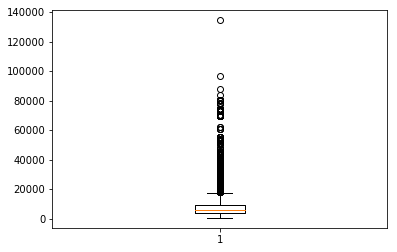

In [15]:
plt.boxplot(df2.SPUS)
plt.show()

In [16]:
df3 = df2[df2.SPUS < 20000].copy()

In [17]:
df3.shape

(7363, 13)

# Regression Model
The regression will not run if the data type for any of the columns is an Object and not an integer so we had to change some of the columns data types

In [18]:
df3['HorsePower'] = pd.to_numeric(df3['HorsePower'])
df3['Trans'] = pd.to_numeric(df3['Trans'])
df3['First Owner'] = pd.to_numeric(df3['First Owner'])
df3['Dealer'] = pd.to_numeric(df3['Dealer'])
df3['First Owner'] = pd.to_numeric(df3['First Owner'])
df3['Diesel'] = pd.to_numeric(df3['Diesel'])
df3['EngineSize'] = pd.to_numeric(df3['EngineSize'])

Creating the Honda binary variable

In [19]:
df3['Honda'] = 0
df3.Honda[df3.Make == 'Honda'] = 1

/Users/davidabraham/opt/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
df3.head()

,year,seats,Make,MPG,EngineSize,HorsePower,SPUS,Miles,Trans,First Owner,Dealer,Diesel,Yr,Honda
0,2014,5.0,Maruti,54.42,1248,74.00,6050.01,90409.73,0,1,0,1,64,0
1,2014,5.0,Skoda,49.16,1498,103.52,4974.46,74564.73,0,0,0,1,64,0
2,2006,5.0,Honda,41.16,1497,78.00,2124.23,86992.18,0,0,0,0,56,1
3,2010,5.0,Hyundai,53.49,1396,90.00,3025.01,78914.34,0,1,0,1,60,0
4,2007,5.0,Maruti,37.44,1298,88.20,1747.78,74564.73,0,1,0,0,57,0


In [21]:
df3 = df3.dropna()

In [22]:
import statsmodels.api as sm
import math
X = df3[['seats','MPG', 'EngineSize', 'HorsePower', 'Miles', 'Trans',\
        'First Owner', 'Dealer','Diesel', 'Yr','Honda']].copy() 
Y = df3['SPUS'].copy() 
X = sm.add_constant(X) 
est = sm.OLS(Y,X).fit() 
predictions = est.predict() 
print(est.summary())
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:                   SPUS   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1526.
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:53:54   Log-Likelihood:                -66372.
No. Observations:                7362   AIC:                         1.328e+05
Df Residuals:                    7350   BIC:                         1.329e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.081e+04    484.948    -63.541      

In [23]:
df3['EngineSize'].min()


624

# Memo
In our regression model our focus is to find out which variable best predicts the selling price of a car. In our data set we included the variables Engine Size, MPG, seats, Year Index, type of fuel, what number owner the car belongs to, milage on the car, transmission, and horsepower. After running our model, we came up with Figure 1. Since our probability F statistic is lower than 0.05, we have a linear model. Our R squared is significant being that the value is 0.696 meaning about 70% of our data is being explained by the predictions the model came up with. The deviation between R squared and Adj R squared can be an indication of model overfit. In the case of our model the difference between to 2 is only 0.01 telling us we do not suffer from model overfit. The average error in our predictions is 1992.99 which is bad considering the mean for selling price is only 6275 dollars.

For our original regression model, the y-intercept is the "constant" our model produced which is -30,810. This number looks weird but selling a car with no engine, no seats, no miles, and built in 1950 is super unrealistic so this is a logical y-int. Seats in our model was given a coefficient of 164.57, every seat in the car adds on average 165 dollars in value. MPG was given a coefficient of -1.39, this is the opposite of intuition, adding MPG should add value to a car. Our model gives us a P>|t| of 0.470 for MPG, typically any P>/t/ value over 0.05 renders the variable insignificant. Wondering why this is Figure 5 explains that seats and engine size correlates with MPG (more seats & more engine makes for a heavier car) this could be why it is insignificant. Engine Size was given a coefficient of 0.79 meaning for each CC bigger your engine is adding 80 cents in value on average, which seems logical considering each engine over 600 CC. For each unit of Horsepower 52.17 dollars of value is added to the car. Miles gives us a negative beta coefficient of 0.007 which means the car depreciates about 1 cent for every mile the car is driven. An automatic transmission will add on average 1023.13 of cost compared to a manual transmission. Being the first owner of your car adds 559.16 of value to the car, answering the question if first time owners pay more for the same exact car as 2nd, 3rd, etc. every extra owner depreciates the value of the car. Another interesting point is that if the same car is sold to you from a dealer compared to an Individual seller this increases the value as well, by approximately 397.28. Another question asked was if a car that runs on diesel fuel is worth more money. Diesel was given a coefficient of 1141.24, meaning yes, they are worth more. This could raise the thought that diesel cars are worth more because intuition tells you they will have higher engine size and horsepower. In figure 5 we test the multicollinearity of our predictor variables and find that Horsepower and Engine Size do correlate well with cars running on diesel fuel. For the year index we come up with a coefficient of 471.05, for every year newer the car is approximately 471.05 dollars is added to the selling price. Then for our car manufacturer we chose Honda to see if the brand name adds to the cost of the car. A Honda vehicle adds 349.38 in value compared to other makes. All our coefficients retained a P>|t| value under .05, besides MPG, we know they are significant and can keep them in our model. T values are found by dividing our coefficients by the std error, the T values are used to test how strong the coefficient is compared to its error, the higher the better. The goal for our model is to have T values above 2, we reach this for every variable besides MPG.

To gauge model overfitting we split our data into a train and a test data set. We used the train dataset to develop the model and then used test dataset to gauge its generalizability. Figure 2 contains the model produced from the Training set; Figure 3 is the Test data. Comparing the train data set to our test a few statistics stood out. MPG remained insignificant for both. The seats coefficient is now 137.61 in train about 100 dollars less than the test data which says seats add 231.50. Our probability F statistic was 0.00 for both. The average error was 1993.10 which is consistent with test average error 1980.79. Our probability F statistic was 0.00 for both. The R squared is slightly better for the test data and the small deviation of 0.02 between R squared and Adj R squared for our test data indicates we do not suffer from model overfit. This makes logical sense, because have 7000+ rows of data.

Multicollinearity refers to high correlation among models features but correlation among features reflects duplicate information in the model. We used VIF function from figure 4 to examine our multicollinearity. Features with VIF values over 2 were examined. The features with high VIF values are seats, MPG, Horsepower, Engine Size, Diesel, and Year Index. To confirm our suspicion of multicollinearity we came up with Figure 5 to see if the correlation between features makes logical sense. Features correlating over 0.5 is a cause for concern, it would make sense to remove one of 2 features to decrease our multicollinearity. As suspected in the first paragraph seats correlates with Engine Size which makes sense because if a car has more seats it is most likely heavier and needs more engine power. MPG has a significant inverse correlation with engine size, meaning cars with bigger engines are less fuel efficient. Engine size posts the highest VIF out of all of the features, we have already stated it correlates with seats, and inversely with MPG but it also correlates with Horse power which is very intuitive because a larger engine of course produces more horse power. For that reason, Horsepower also had a VIF over 2. Diesel is the next feature of concern but as stated before this is because of its correlation with engine size and horsepower. Year index has a VIF score of over 2 but this is because its correlation with First Owner.

After this analysis of multicollinearity, we decided to remove Engine Size because that was the feature that had the highest VIF and it correlated with most of the features that had issues of multicollinearity. Thus, producing Figure 6 and the ensuing VIF scores on Figure 7. Oddly enough with this new and improved regression model R squared decreased and the average error raised slightly.

# Appendix

**Figure #1**

In [24]:
X = df3[['seats','MPG', 'EngineSize', 'HorsePower', 'Miles', 'Trans',\
        'First Owner', 'Dealer','Diesel', 'Yr','Honda']].copy() 
Y = df3['SPUS'].copy() 
X = sm.add_constant(X) 
est = sm.OLS(Y,X).fit() 
predictions = est.predict() 
print(est.summary())
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:                   SPUS   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1526.
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:55:18   Log-Likelihood:                -66372.
No. Observations:                7362   AIC:                         1.328e+05
Df Residuals:                    7350   BIC:                         1.329e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.081e+04    484.948    -63.541      

**Figure #2**

**Training Data**

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, \
        test_size = 0.3, random_state = 2)

In [27]:
import statsmodels.api as sm
import math
from sklearn.metrics import mean_squared_error

X_train = sm.add_constant(X_train) 
est = sm.OLS(y_train,X_train).fit() 
predictions = est.predict() 
print(est.summary()) 
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:                   SPUS   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     1061.
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:56:28   Log-Likelihood:                -46455.
No. Observations:                5153   AIC:                         9.293e+04
Df Residuals:                    5141   BIC:                         9.301e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.139e+04    576.368    -54.460      

**Figure 3**

**Testing data**



In [28]:
X_test = sm.add_constant(X_test) 
est = sm.OLS(y_test,X_test).fit() 
predictions = est.predict() 
print(est.summary()) 
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:                   SPUS   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     474.7
Date:                Mon, 28 Dec 2020   Prob (F-statistic):               0.00
Time:                        17:57:06   Log-Likelihood:                -19897.
No. Observations:                2209   AIC:                         3.982e+04
Df Residuals:                    2197   BIC:                         3.989e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.858e+04    912.436    -31.323      

**Figure 4**

**VIF statistics**

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = est.model.exog 
vif = pd.DataFrame() 
vif["VIF Factor"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["features"] = X_test.columns
print('VIF: {}'.format(vif))

VIF:     VIF Factor     features
0   468.732818        const
1     2.348888        seats
2     3.263239          MPG
3     5.196538   EngineSize
4     2.214486   HorsePower
5     1.609623        Miles
6     1.181649        Trans
7     1.332663  First Owner
8     1.116548       Dealer
9     2.670808       Diesel
10    2.120479           Yr
11    1.099878        Honda


**Figure 5**

**Correlation**

In [30]:
corr = X_test.corr()
corr.style.background_gradient()

/Users/davidabraham/opt/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/colors.py:496: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,const,seats,MPG,EngineSize,HorsePower,Miles,Trans,First Owner,Dealer,Diesel,Yr,Honda
const,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
seats,nan,1,-0.46302,0.690856,0.282905,0.244046,-0.0512299,-0.014018,-0.089636,0.34228,0.0105,-0.0771077
MPG,nan,-0.46302,1,-0.550389,-0.358755,-0.224789,-0.0751582,0.195167,0.0607588,0.134724,0.391792,0.000983957
EngineSize,nan,0.690856,-0.550389,1,0.645024,0.327112,0.0688134,-0.0665906,-0.00457184,0.532704,-0.0510219,0.0151474
HorsePower,nan,0.282905,-0.358755,0.645024,1,0.10984,0.233646,0.0254272,0.0852209,0.332442,0.139738,0.154861
Miles,nan,0.244046,-0.224789,0.327112,0.10984,1,-0.158137,-0.303283,-0.174541,0.354518,-0.454918,-0.0632142
Trans,nan,-0.0512299,-0.0751582,0.0688134,0.233646,-0.158137,1,0.100857,0.219849,-0.114864,0.178371,0.108854
First Owner,nan,-0.014018,0.195167,-0.0665906,0.0254272,-0.303283,0.100857,1,0.182699,-0.0437976,0.47695,0.0672111
Dealer,nan,-0.089636,0.0607588,-0.00457184,0.0852209,-0.174541,0.219849,0.182699,1,-0.0436721,0.157469,0.139281
Diesel,nan,0.34228,0.134724,0.532704,0.332442,0.354518,-0.114864,-0.0437976,-0.0436721,1,0.0457285,-0.123044
